In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=pl-yamal---pl-tso-0001entrytransmission,pl---------pl-tso-0002exitstorage,pl---------pl-tso-0002exittransmissionpl-yamal---,pl---------pl-tso-0002exittransmissioncz---------,pl---------pl-tso-0002entrydistribution,pl-l-gas---pl-tso-0002exitdistribution,pl-yamal---pl-tso-0001exittransmissionde-the-----,pl-l-gas---pl-tso-0002exitproduction,pl-l-gas---pl-tso-0002entrydistribution,pl-yamal---pl-tso-0001entrytransmissionpl---------,pl---------pl-tso-0002entrytransmissionde-the-----,pl---------pl-tso-0002exittransmission,pl-l-gas---pl-tso-0002entryproduction,pl-l-gas---pl-tso-0002exitfinal%20consumers,pl---------pl-tso-0002exitfinal%20consumers,pl---------pl-tso-0002entrylng%20terminals,pl---------pl-tso-0002entrytransmission,pl-yamal---pl-tso-0001entrytransmissionde-the-----,pl---------pl-tso-0002entrytransmissioncz---------,pl---------pl-tso-0002entrystorage&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesPLPL-YAMAL---PL-TSO-0001entryTransm...        1   Aggregates   
1    1AggregatesPLPL-YAMAL---PL-TSO-0001entryTransm...        1   Aggregates   
2    1AggregatesPLPL-YAMAL---PL-TSO-0001entryTransm...        1   Aggregates   
3    1AggregatesPLPL-YAMAL---PL-TSO-0001exitTransmi...        1   Aggregates   
4    1AggregatesPLPL---------PL-TSO-0002entryDistri...        1   Aggregates   
..                                                 ...      ...          ...   
615  1AggregatesPLPL---------PL-TSO-0002exitTransmi...        1   Aggregates   
616  1AggregatesPLPL---------PL-TSO-0002exitTransmi...        1   Aggregates   
617  1AggregatesPLPL-L-gas---PL-TSO-0002exitDistrib...        1   Aggregates   
618  1AggregatesPLPL-L-gas---PL-TSO-0002exitFinal C...        1   Aggregates   
619  1AggregatesPLPL-L-gas---PL-TSO-0002exitProduct...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day      value
0          entry    2  355686926
1          entry    2   15165969
2          entry    2          0
3           exit    2  174153749
4          entry    2     306924
..           ...  ...        ...
615         exit    1          0
616         exit    1          0
617         exit    1   16436068
618         exit    1     505779
619         exit    1    3399383

[620 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         5.117482e+07
    exit          1.678498e+07
2   entry         8.378804e+07
    exit          4.707399e+07
3   entry         8.169998e+07
...                        ...
29  exit          3.241853e+07
30  entry         6.959215e+07
    exit          4.473187e+07
31  entry         7.644005e+07
    exit          4.659157e+07

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

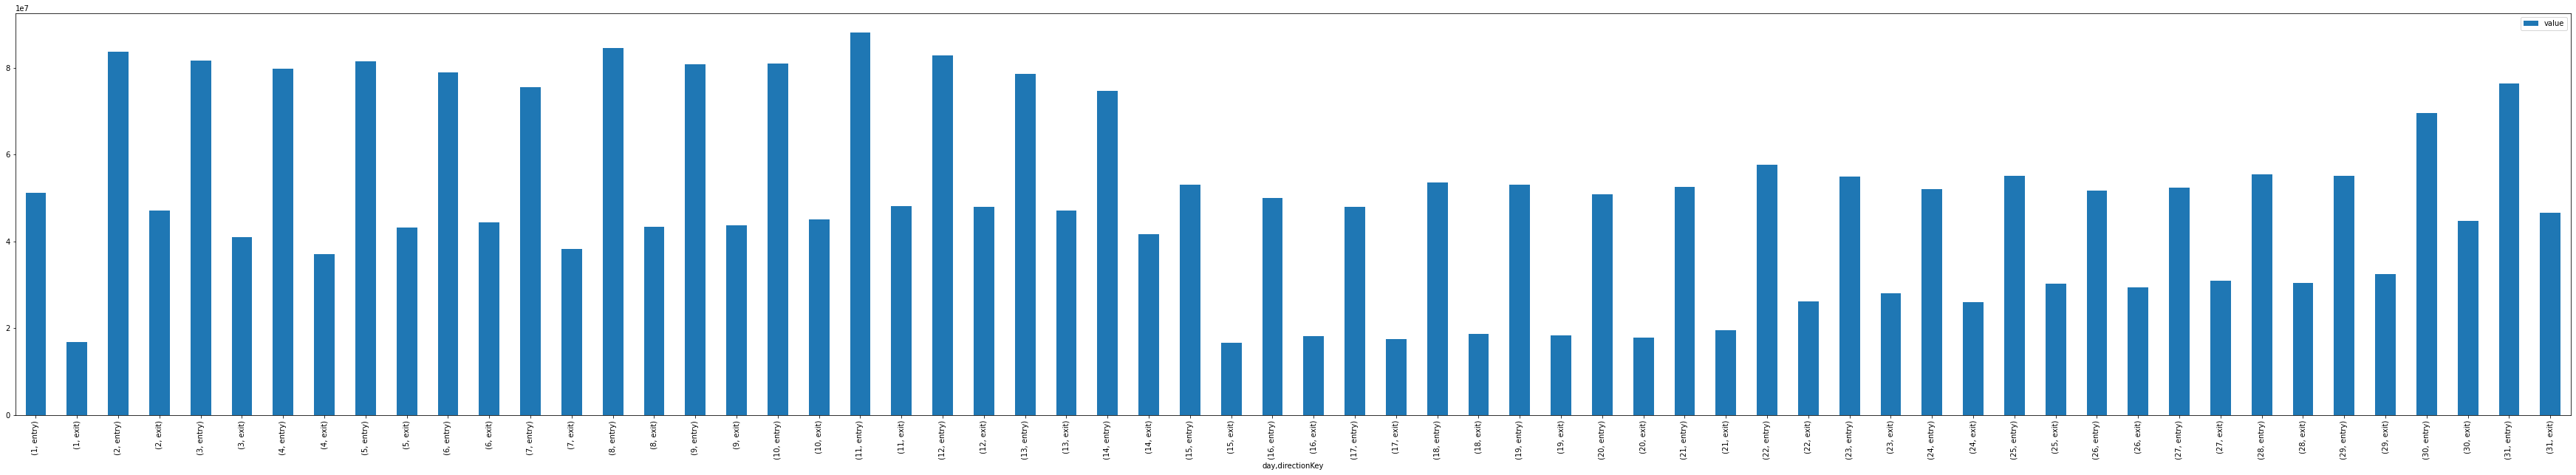

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))